In [1]:
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Boston.csv',index_col=False)
X = df[['crim', 'zn', 'indus', 'age', 'dis',
       'rad']]
Y = df[['medv']]

In [3]:
def derivative(x,y,h,m,w,a,L):
    dv1 = w*(1-((a*L)/m))
    dv2 = a*(1/m)*np.sum(np.dot(x.T,(h-y)))
    return dv1-dv2

def cost(y,h,m):
    return (1/(2*m))*(np.sum((h-y)**2))
                                
def linear_reg(X,Y,a,epoch,L):
    
    theta0 = np.ones((X.shape))
    X = np.concatenate((theta0,X), axis=1)
    
    xr,xc = X.shape
    m = xc
    w = np.zeros((xc,1))
    
    for i in tqdm(range(0,epoch)): 
        h = np.dot(X,w)
                    
        gradd = derivative(X,Y,h,m,w,a,L)
        cost_t.append(cost(Y,h,m))
        w = gradd
        
    result = np.dot(X,w)
    return result
    

In [4]:
cost_t = []
lr = linear_reg(X,Y,0.00000001, 1000,0.5)

100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 351.47it/s]


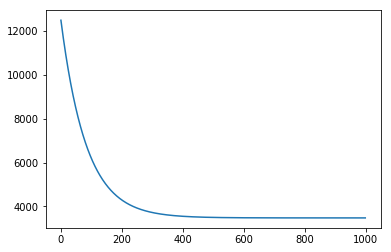

In [5]:
plt.plot(cost_t)

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
mean_squared_error(Y,lr)

164.92912415213934